In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# Loading the dataset
url = "https://raw.githubusercontent.com/sunnysavita10/credit_card_pw_hindi/main/creditCardFraud_28011964_120214.csv"
columns = [
    'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3',
    'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
    'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4',
    'PAY_AMT5', 'PAY_AMT6', 'default payment next month'
]
data = pd.read_csv(url, names=columns, header=0)

In [3]:
# Exploring the dataset
print("Dataset Overview:")
print(data.head())

print("\nDataset Info:")
print(data.info())

print("\nChecking for missing values:")
print(data.isnull().sum())

# Basic statistics
print("\nDataset Statistics:")
print(data.describe())


Dataset Overview:
   LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0      50000    1          2         1   57     -1      0     -1      0   
1      50000    1          1         2   37      0      0      0      0   
2     500000    1          1         2   29      0      0      0      0   
3     100000    2          2         2   23      0     -1     -1      0   
4     140000    2          3         1   28      0      0      2      0   

   PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0      0  ...      20940      19146      19131      2000     36681     10000   
1      0  ...      19394      19619      20024      2500      1815       657   
2      0  ...     542653     483003     473944     55000     40000     38000   
3      0  ...        221       -159        567       380       601         0   
4      0  ...      12211      11793       3719      3329         0       432   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment n

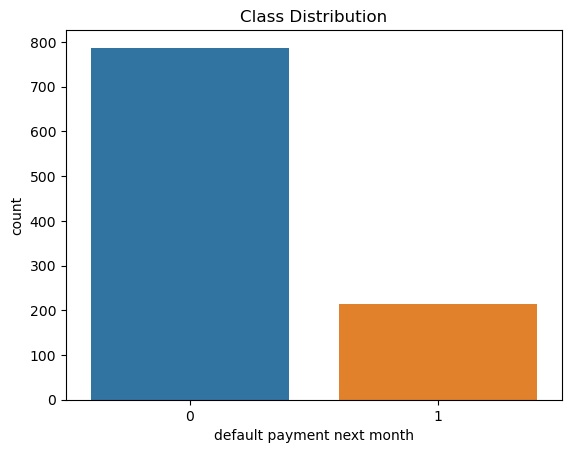

In [4]:
# Visualizing the class distribution
sns.countplot(x='default payment next month', data=data)
plt.title("Class Distribution")
plt.show()

In [5]:
# Splitting the data into features and target
X = data.drop(columns=['default payment next month'])
y = data['default payment next month']

In [6]:
# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [7]:
# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
# Training a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [9]:
# Making predictions
y_pred = model.predict(X_test)

In [10]:
# Evaluating the model
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


Confusion Matrix:
[[226  11]
 [ 49  15]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.95      0.88       237
           1       0.58      0.23      0.33        64

    accuracy                           0.80       301
   macro avg       0.70      0.59      0.61       301
weighted avg       0.77      0.80      0.77       301


Accuracy Score:
0.8006644518272426


In [11]:
# Feature Importance
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

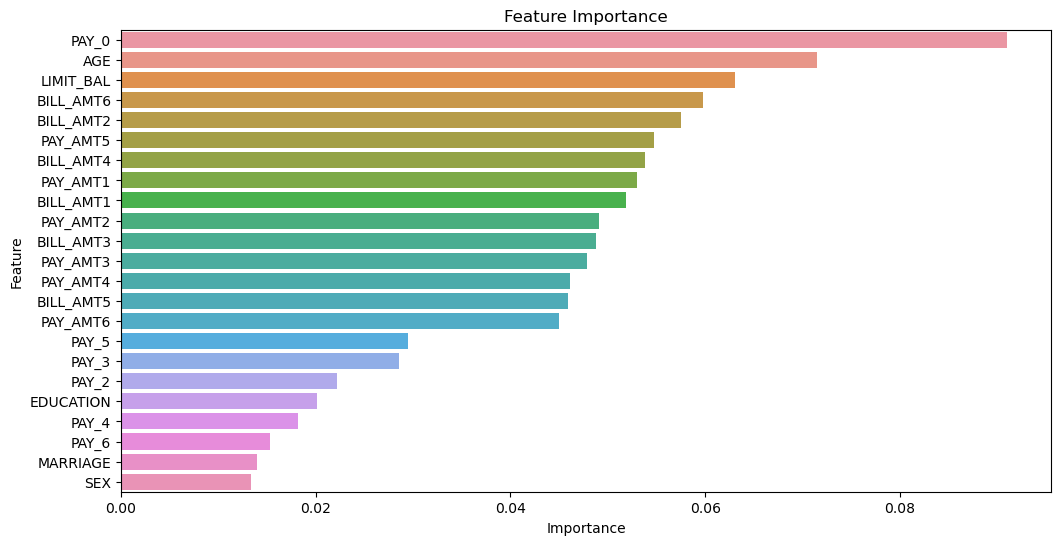

In [12]:
# Visualizing feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title("Feature Importance")
plt.show()